# Lab 3 - ChiSquare

**Dataset:** Titanic Train dataset

**Done by:** Manojkumar V K

**Roll no:** CB.EN.U4CSE17040


In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns

Q1. Read the titanic dataset

In [2]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Preprocessing

Q2. Preprocess the data

In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df['Age'].fillna(method='ffill',inplace=True)
df['Cabin'].fillna(method='bfill',inplace=True)
df['Cabin'].fillna(method='ffill',inplace=True)
df['Embarked'].fillna(method='ffill',inplace=True)

In [5]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

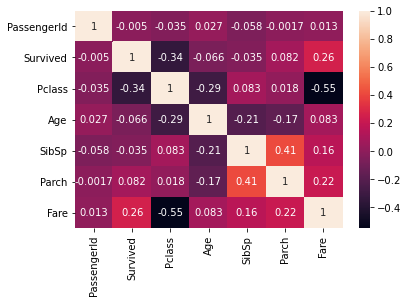

In [6]:
sns.heatmap(df.corr(),annot=True)

In [7]:
df.drop(columns=['PassengerId','Name','Age','Ticket','Fare'], inplace=True)
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Cabin,Embarked
0,0,3,male,1,0,C85,S
1,1,1,female,1,0,C85,C
2,1,3,female,0,0,C123,S
3,1,1,female,1,0,C123,S
4,0,3,male,0,0,E46,S


In [8]:
from scipy import stats

In [9]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Cabin,Embarked
0,0,3,male,1,0,C85,S
1,1,1,female,1,0,C85,C
2,1,3,female,0,0,C123,S
3,1,1,female,1,0,C123,S
4,0,3,male,0,0,E46,S


Q3. Count the total number of passengers

In [10]:
print('Total number of passengers on Titanic: ',len(df))

Total number of passengers on Titanic:  891


Q4. Count the number of passengers who survived

In [11]:
print('Total number of passengers who survived: ',len(df[df['Survived'] == 1]))

Total number of passengers who survived:  342


Q5. Measure the percentage of passengers who survived the sinking ship

In [12]:
print('Percentage of passengers who survived: ',((len(df[df['Survived'] == 1]) / len(df))*100))

Percentage of passengers who survived:  38.38383838383838


Q6. Count the number of passengers based on gender

In [13]:
print('Number of male passengers: ',len(df[df['Sex']=='male']))
print('Number of female passengers: ',len(df[df['Sex']=='female']))

Number of male passengers:  577
Number of female passengers:  314


## Chi-squared analysis

In [14]:
pd.crosstab(df['Survived'], df['Sex'],margins=True)

Sex,female,male,All
Survived,,,
0,81,468,549
1,233,109,342
All,314,577,891


In [15]:
data = pd.crosstab(df['Survived'], df['Sex'])
data

Sex,female,male
Survived,,
0,81,468
1,233,109


In [16]:
print('Percentage of male survivors: ', ((data['male'][1])/(data['male'][1] + data['female'][1]) * 100))
print('Percentage of female survivors: ', ((data['female'][1])/(data['male'][1] + data['female'][1]) * 100))

Percentage of male survivors:  31.871345029239766
Percentage of female survivors:  68.12865497076024


Q7. Run a chi-square test for the following hypothesis

**Hypothesis:** The proportion of females onboard who survived the sinking of the Titanic was higher than the proportion of males onboard who survived the sinking of the Titanic.

In [17]:
hypothesis = 'The proportion of females onboard who survived the sinking of the Titanic was higher than the proportion of males onboard who survived the sinking of the Titanic.'

In [18]:
data['female'] = (data['female']/(data.sum().sum()))*100
data['male'] = (data['male']/(data.sum().sum()))*100
data

Sex,female,male
Survived,,
0,9.090909,76.440449
1,26.150393,17.803438


In [19]:
chiStats = stats.chi2_contingency(data)
chiStats

(32.57576723451966,
 1.1463517582471743e-08,
 1,
 array([[23.27861928, 62.25273879],
        [11.96268263, 31.99114809]]))

In [20]:
criticalValue = stats.chi2.ppf(q=0.95, df = chiStats[2])

In [21]:
print('Critical value     = ',criticalValue)
print('Chi squared        = ',chiStats[0])
print('P value            = ',chiStats[1])
print('Degree of freedom  = ',chiStats[2])
print('Expected cross tab = \n',chiStats[3])

Critical value     =  3.841458820694124
Chi squared        =  32.57576723451966
P value            =  1.1463517582471743e-08
Degree of freedom  =  1
Expected cross tab = 
 [[23.27861928 62.25273879]
 [11.96268263 31.99114809]]


Q8. Inference based on test

In [22]:
if chiStats[0] < criticalValue:
    print('At 0.95 level of confidence, we reject the hypothesis:\n', hypothesis)
else:
    print('At 0.95 level of confidence, we accept the hypothesis:\n', hypothesis)

At 0.95 level of confidence, we accept the hypothesis:
 The proportion of females onboard who survived the sinking of the Titanic was higher than the proportion of males onboard who survived the sinking of the Titanic.


In [23]:
# df.to_csv('train1.csv', index = False)